<a href="https://colab.research.google.com/github/tesa0/ML_python/blob/main/DFpreparation%2BSequential_%2BAutoML_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb     
import matplotlib.pyplot as plt     
import datetime
import sklearn.model_selection
import sklearn.metrics
import tensorflow as tf

from datetime import datetime

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  precision_score, recall_score,precision_recall_curve #plot_confusion_matrix,

from tensorflow.keras.callbacks import ModelCheckpoint,Callback,BackupAndRestore
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import utils   
from tensorflow.keras.optimizers import Adam, Adadelta 

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/MA/t1_20220101_20220726_rg_201589066.csv'            # счетчик 1.1, цель 201589066, 22-01-01 - 22-07-26 visits

df = pd.read_csv(file_path1, header=0)
df1 = df.copy()

Mounted at /content/drive


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
col1= list(df1.columns) # счетчик 1.1, цель 201589066, 22-01-01 - 22-07-26 visits
# df1.columns
df1 = df1.drop(['Unnamed: 0.1','Unnamed: 0','ym:s:from','ym:s:lastSocialNetworkProfile',
                'ym:s:lastSocialNetwork','ym:s:openstatAd','ym:s:openstatCampaign','ym:s:openstatService',
                'ym:s:openstatSource','ym:s:browserCountry','ym:s:firstGCLID','ym:s:lastDirectClickOrder',
                'ym:s:lastDirectPlatform','ym:s:lastGCLID','ym:s:lastReferalSource',
                'ym:s:lastSignificantGCLID','ym:s:networkType', 'ym:s:referer','ym:s:regionCity',
                'ym:s:UTMCampaign','ym:s:UTMContent','ym:s:UTMSource','ym:s:UTMTerm','ym:s:browserLanguage',
                'ym:s:cookieEnabled','ym:s:goalsPrice','ym:s:goalsSerialNumber',
                'ym:s:ipAddress','ym:s:impressionsProductCoupon','ym:s:offlineCallHoldDuration',
                'ym:s:offlineCallMissed','ym:s:offlineCallURL','ym:s:watchIDs'], axis=1)

In [3]:
df1['ym:s:date'] = [pd.to_datetime(x) for x in df1['ym:s:date']]

In [4]:
df1['ym:s:lastDirectBannerGroup'] = [0 if el==0 else 1 for el in df1['ym:s:lastDirectBannerGroup']]

df1['ym:s:offlineCallTag'] = ['1' if '1' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '2' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '3' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '4' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = [1 if '1' in el else 0 for el in df1['ym:s:offlineCallTag']]

df1['ym:s:endURL'] = [x[7:] for x in df1['ym:s:endURL']]
df1['ym:s:startURL'] = [x[9:] for x in df1['ym:s:startURL']]

df1['ym:s:offlineCallTalkDuration'] = [x[1:-1] for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = [x.replace("''","") for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = ['0' if x == '' else max(x.split(',')) for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = [int(x) for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = df1['ym:s:offlineCallTalkDuration']/max(df1['ym:s:offlineCallTalkDuration'])

df1['ym:s:diagonal'] = ((df1['ym:s:screenHeight']**2+df1['ym:s:screenWidth']**2)**0.5)
df1['ym:s:diagonal'] = round(df1['ym:s:diagonal'] / max(df1['ym:s:diagonal']),2)

df1 = df1.drop(['ym:s:screenHeight', 'ym:s:screenWidth'], axis=1)

df1['ym:s:lastDirectClickBanner'] = [0 if el==0 else 1 for el in df1['ym:s:lastDirectClickBanner']]

df1['ym:s:lastDirectClickBannerName'] = [x[26:] for x in df1['ym:s:lastDirectClickBannerName']]
df1['ym:s:lastDirectClickBannerName'] = [int(x) for x in df1['ym:s:lastDirectClickBannerName']]
df1['ym:s:lastDirectClickBannerName'] = round((df1['ym:s:lastDirectClickBannerName'])/max(df1['ym:s:lastDirectClickBannerName']),2)

df1['ym:s:visitDuration'] = round((df1['ym:s:visitDuration'])/max(df1['ym:s:visitDuration']),2)

df1['ym:s:lastClickBannerGroupName'] = [el.lower() for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['2022' if '2022' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['фили' if 'фили' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['Headliner' if 'headliner' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['застройщик' if 'застройщик' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['Не отказ' if 'не отказ' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['конкурент' if 'конкурент' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['запрос' if 'запрос' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['2021' if '2021' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['жк' if 'жк' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['центр сити' if 'центр сити' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['москва' if 'москв' in el else el for el in df1['ym:s:lastClickBannerGroupName']]

df1['ym:s:lastDirectPhraseOrCond'] = [x[23:] for x in df1['ym:s:lastDirectPhraseOrCond']]

df1['ym:s:goalsDateTime'] = [x.replace("[","") for x in df1['ym:s:goalsDateTime']]
df1['ym:s:goalsDateTime'] = [x.replace("]","") for x in df1['ym:s:goalsDateTime']]
df1['ym:s:goalsDateTime'] = [x[2:12] for x in df1['ym:s:goalsDateTime']]
df1 = df1.drop(df1[df1['ym:s:goalsDateTime']==''].index) # ---------------------------------------------
df1['ym:s:goalsDateTime'] = [datetime.strptime(x, '%Y-%m-%d') for x in df1['ym:s:goalsDateTime']]

df1['ym:s:deltaTime'] = df1['ym:s:goalsDateTime'] - df1['ym:s:date']
df1['ym:s:deltaTime'] = [x.components.days for x in df1['ym:s:deltaTime']]
df1['ym:s:deltaTime'] = df1['ym:s:deltaTime']/max(df1['ym:s:deltaTime'] )

df1 = df1.drop(['ym:s:date', 'ym:s:goalsDateTime'], axis=1)

# модель с учителем
df1['Y'] = [1 if '201589066' in el else 0 for el in df1['ym:s:goalsID']]
df1 = df1.drop(['ym:s:visitID','ym:s:clientID','ym:s:goalsID'], axis=1)
df1 = df1.dropna(axis=1)
     

In [5]:
# will be categories :
# Названия колонок которые необходимо закодирвать
cols_encode = ['ym:s:lastAdvEngine', 'ym:s:deviceCategory', 'ym:s:hasGCLID', 'ym:s:isNewUser', 
               'ym:s:javascriptEnabled', 'ym:s:lastDirectBannerGroup', 'ym:s:lastDirectClickBanner',
               'ym:s:offlineCallTag','ym:s:pageViews','ym:s:screenOrientation','ym:s:startURL',
               'ym:s:endURL','ym:s:bounce','ym:s:lastClickBannerGroupName','ym:s:lastClickBannerGroupName',
               'ym:s:lastDirectClickOrderName','ym:s:lastDirectPhraseOrCond', 'ym:s:lastTrafficSource'] 
df1[cols_encode].replace(pd.NA,'empty') 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in cols_encode:
  df1[col]=le.fit_transform(df1[col])

# df1[cols_encode]
df1['Y'].value_counts()
     

0    121641
1      1307
Name: Y, dtype: int64

In [6]:
# numbers too big
col_big_nums = ['ym:s:endURL', 'ym:s:lastDirectPhraseOrCond','ym:s:startURL','ym:s:lastDirectClickOrderName','ym:s:lastClickBannerGroupName']
df1 = df1.drop(col_big_nums, axis=1)
# df1.describe().transpose()[['count',	'mean',	'std',	'min', 'max']] 
df1['Y'].value_counts()
     

0    121641
1      1307
Name: Y, dtype: int64

In [7]:
# что осталосьобработать: на время можно удалить из модели

# for el in [ 'ym:s:lastDirectClickOrderName']:
#        print(len(df1))
#        print(df1[el].unique()[:5])


In [8]:
df1 = df1.drop(['ym:s:offlineCallFirstTimeCaller'], axis=1)
df1['Y'].value_counts()
     

0    121641
1      1307
Name: Y, dtype: int64

In [9]:
# df1.to_csv (r'/content/drive/MyDrive/MA/ma1.csv', index = False, header=True)
df1

,ym:s:bounce,ym:s:deviceCategory,ym:s:hasGCLID,ym:s:isNewUser,ym:s:javascriptEnabled,ym:s:lastAdvEngine,ym:s:lastDirectBannerGroup,ym:s:lastDirectClickBanner,ym:s:lastDirectClickBannerName,ym:s:lastTrafficSource,ym:s:offlineCallTag,ym:s:offlineCallTalkDuration,ym:s:pageViews,ym:s:screenOrientation,ym:s:visitDuration,ym:s:diagonal,ym:s:deltaTime,Y
3,0,1,0,1,1,7,1,1,0.00,0,0,0.0,1,1,0.00,0.14,0.0,0
7,0,0,0,1,1,8,0,1,0.00,1,0,0.0,6,2,0.07,0.34,0.0,0
15,0,1,0,0,1,8,0,1,0.01,2,0,0.0,1,1,0.00,0.16,0.0,0
17,0,0,0,1,1,2,0,1,0.01,0,0,0.0,1,2,0.00,0.45,0.0,0
19,0,1,0,1,1,5,0,1,0.01,0,0,0.0,2,1,0.00,0.14,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361894,0,1,0,0,1,8,0,0,0.00,0,0,0.0,1,1,0.04,0.13,0.0,0
361895,0,1,0,1,1,2,0,0,0.00,0,0,0.0,2,1,0.03,0.14,0.0,0
361908,0,1,0,1,1,7,1,1,0.02,0,0,0.0,0,1,0.01,0.11,0.0,0
361912,0,0,1,1,1,9,0,0,0.00,0,0,0.0,1,2,0.01,0.24,0.0,0


In [10]:
df1['Y'].value_counts()

0    121641
1      1307
Name: Y, dtype: int64

## Model sequential

In [11]:
df1 = shuffle(df1,random_state=42)

df1_1 = df1[df1['Y']==1]
# print(len(df1_0),len(df1_1))
df1_0 = df1[df1['Y']==0][:1307] # проверяем на модели 
len(df1_0)
df1_all = pd.concat([df1_0,df1_1], axis=0)
cols = list(df1.columns)

X = df1_all[cols[:-1]]
y = df1_all['Y']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print('Размер x_train:',X_train.shape)                             
print('Размер y_train:',y_train.shape)
print('Размер x_test:',X_test.shape)
print('Размер y_test:',y_test.shape)

CLASS_COUNT=2

y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

Размер x_train: (2352, 17)
Размер y_train: (2352,)
Размер x_test: (262, 17)
Размер y_test: (262,)


Epoch 1/42
67/74 [==========================>...] - ETA: 0s - loss: 0.5133 - accuracy: 0.7467
Epoch 1: val_accuracy improved from -inf to 0.81679, saving model to modeldense.mcp.1700.relu.32
74/74 [==============================] - 6s 14ms/step - loss: 0.5013 - accuracy: 0.7555 - val_loss: 0.4092 - val_accuracy: 0.8168
Epoch 2/42
61/74 [=======================>......] - ETA: 0s - loss: 0.3949 - accuracy: 0.8171
Epoch 2: val_accuracy improved from 0.81679 to 0.85878, saving model to modeldense.mcp.1700.relu.32
74/74 [==============================] - 1s 9ms/step - loss: 0.3840 - accuracy: 0.8236 - val_loss: 0.3225 - val_accuracy: 0.8588
Epoch 3/42
68/74 [==========================>...] - ETA: 0s - loss: 0.3361 - accuracy: 0.8534
Epoch 3: val_accuracy improved from 0.85878 to 0.88931, saving model to modeldense.mcp.1700.relu.32
74/74 [==============================] - 1s 10ms/step - loss: 0.3293 - accuracy: 0.8563 - val_loss: 0.2611 - val_accuracy: 0.8893
Epoch 4/42
64/74 [==============

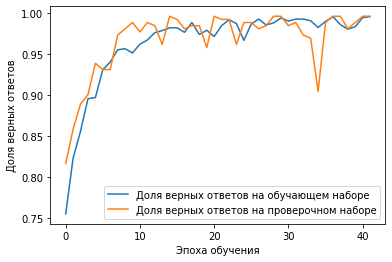

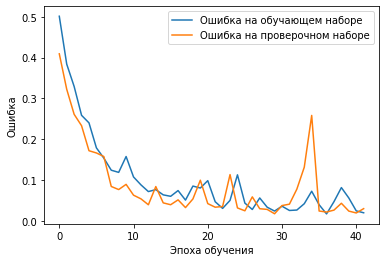

In [13]:
data_list_dense = []
layers=[1700]
activations=['relu']
adam_rate=[0.005]
batch_sizes=[32] # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов

for layer in layers:
  for activation in activations:
    for batch in batch_sizes:
      for lr in adam_rate:
      
        model = Sequential()
        
        modelcheckpoint_1 = ModelCheckpoint(filepath=f'modeldense.mcp.{layer}.{activation}.{batch}', monitor="val_accuracy", mode="max", verbose=1, save_best_only=True) # --- how to use????

        model.add(Dense(layer, input_dim=X_train.shape[1], use_bias = True, activation=activation)) 
        model.add(Dense(CLASS_COUNT, activation='softmax')) 
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=["accuracy"])
        
        # print(f'Neuron layer: {layer}, activation: {activation}, batch_size: {batch}')
        history = model.fit(X_train, y_train, epochs=42, validation_data=(X_test, y_test), shuffle = True, callbacks=[modelcheckpoint_1], batch_size=batch, verbose=1) 
        # model.load_weights(f'model.mcp.{layer}.{activation}.{batch}')


        data_list_dense.append(('Neurons:', layer, 'Activation:', activation, 'Batch: ', batch, 'Learning rate: ', lr, 
                          'Max_accuracy:', round(max(history.history['accuracy']), 2),
                          'Val_accuracy of best train accuracy:', round(history.history['val_accuracy'][np.argmax(history.history['accuracy'])], 2),
                          'Validation accuracy:', round(history.history['val_accuracy'][9], 2)))     
        
       
        print('\n\n')
        print('_________________________________________________________________')
        print(model.summary())
        # Построим графики точности на обучающей и проверочной выборках на протяжении всего обучения:
        import matplotlib.pyplot as plt    
        plt.plot(history.history['accuracy'], 
                label='Доля верных ответов на обучающем наборе')
        plt.plot(history.history['val_accuracy'], 
                label='Доля верных ответов на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Доля верных ответов')
        plt.legend()
        plt.show()

        # графики ошибки:
        plt.plot(history.history['loss'], 
                label='Ошибка на обучающем наборе')
        plt.plot(history.history['val_loss'], 
                label='Ошибка на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Ошибка')
        plt.legend()
        plt.show()

In [14]:
# Вывод результатов экспериментов  с modelcheckpoint_1
for i in data_list_dense:
    print(i)

('Neurons:', 1700, 'Activation:', 'relu', 'Batch: ', 32, 'Learning rate: ', 0.005, 'Max_accuracy:', 1.0, 'Val_accuracy of best train accuracy:', 1.0, 'Validation accuracy:', 0.99)


## AutoML

In [15]:
df1 = shuffle(df1,random_state=42)

df1_1 = df1[df1['Y']==1]
# print(len(df1_0),len(df1_1))
df1_0 = df1[df1['Y']==0][:1307] # проверяем на модели 
len(df1_0)
df1_all = pd.concat([df1_0,df1_1], axis=0)
cols = list(df1.columns)

X = df1_all[cols[:-1]]
y = df1_all['Y']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print('Размер x_train:',X_train.shape)                             
print('Размер y_train:',y_train.shape)
print('Размер x_test:',X_test.shape)
print('Размер y_test:',y_test.shape)

CLASS_COUNT=2

y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

Размер x_train: (2352, 17)
Размер y_train: (2352,)
Размер x_test: (262, 17)
Размер y_test: (262,)


In [17]:
!pip install auto-sklearn
!pip install keras-tuner
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 80.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 98.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 KB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 6.8 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=a96586d73845d8c56c32ce43072ebe31cc4663fbdb37e3751c73971bdc0a8de

In [41]:
from pprint import pprint

# !pip uninstall sklearn
# !pip uninstall scikit-learn
!pip3 install sklearn
!pip3 install auto-sklearn
!pip3 install --upgrade scikit-learn

import sklearn
import joblib
import autosklearn
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# import autosklearn.classification
  
print(sklearn.__version__)

import autokeras as ak 
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.layers import Flatten

# Определение функции для построения модели
def model_builder_2(hp):
  model = Sequential()
  hp_units_dense = hp.Int('units', min_value=32, max_value=256, step=32)

  # Определение количества слоев и их размерности
  for i in range(hp.Int('num_layers', 1, 3)):
      model.add(Dense(units=hp.Int('units_' + str(i), 32, 256, 32), activation=hp.Choice('activation_' + str(i), ['relu', 'tanh', 'sigmoid'])))
  model.add(Flatten())
  model.add(Dense(CLASS_COUNT, activation="softmax"))
  hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.0005, 0.001, 0.005])

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

# Определение гиперпараметров для настройки
tuner_search = Hyperband(model_builder_2,
                            objective='val_accuracy', max_epochs=15,
                            directory='output',
                            project_name='drivers_keras_tuner_2')

# Запуск настройки гиперпараметров
tuner_search.search(X_train, y_train, epochs=7, batch_size=32,  validation_data=(X_test, y_test))
models = tuner_search.get_best_models(num_models=2)
best_model = tuner_search.get_best_models(num_models=1)[0]

# Получение наилучшей модели
best_model_2 = tuner_search.get_best_models(num_models=1)[0]

# Оценка наилучшей модели на тестовых данных
test_loss, test_accuracy_2 = best_model_2.evaluate(X_test, y_test)



Trial 30 Complete [00h 00m 12s]
val_accuracy: 0.9923664331436157

Best val_accuracy So Far: 0.9961832165718079
Total elapsed time: 00h 02m 48s
9/9 [==============================] - 0s 5ms/step - loss: 0.0513 - accuracy: 0.9962


In [42]:
best_model_2.summary()
print('Test accuracy:', test_accuracy_2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224)               4032      
                                                                 
 dense_1 (Dense)             (None, 224)               50400     
                                                                 
 flatten (Flatten)           (None, 224)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 450       
                                                                 
Total params: 54,882
Trainable params: 54,882
Non-trainable params: 0
_________________________________________________________________
Test accuracy: 0.9961832165718079


In [ ]:
# !pip install pip==21.3.1
# !pip install talos
# !pip install talos
# import joblib
# !pip install --upgrade scikit-learn
# import talos
# from talos.model.normalizers import lr_normalizer
# from talos import Scan
#from talos.utils import dataset

## Auto ML on full data

In [43]:
df1 = shuffle(df1,random_state=42)

df1_1 = df1[df1['Y']==1]
df1_0 = df1[df1['Y']==0] # проверяем на модели 

print(len(df1_0),len(df1_1))

df1_all = pd.concat([df1_0,df1_1], axis=0)
cols = list(df1.columns)

X = df1_all[cols[:-1]]
y = df1_all['Y']

121641 1307


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print('Размер x_train:',X_train.shape)                             
print('Размер y_train:',y_train.shape)
print('Размер x_test:',X_test.shape)
print('Размер y_test:',y_test.shape)

CLASS_COUNT=2

y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

Размер x_train: (110653, 17)
Размер y_train: (110653,)
Размер x_test: (12295, 17)
Размер y_test: (12295,)


In [45]:
# !pip install auto-sklearn
!pip install keras-tuner
# !pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from sklearn.metrics import f1_score

In [47]:
from pprint import pprint

import autosklearn
import sklearn
print(sklearn.__version__)

import autokeras as ak 
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.layers import Flatten


from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# Определение функции для построения модели
def model_builder_2(hp):
  model = Sequential()
  hp_units_dense = hp.Int('units', min_value=32, max_value=256, step=32)
  # Определение количества слоев и их размерности
  for i in range(hp.Int('num_layers', 1, 3)):
      model.add(Dense(units=hp.Int('units_' + str(i), 32, 256, 32), activation=hp.Choice('activation_' + str(i), ['relu', 'tanh', 'sigmoid'])))
  model.add(Flatten())
  model.add(Dense(CLASS_COUNT, activation="softmax"))
  hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.0005, 0.001, 0.005])

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=[f1_m])

  return model

# Определение гиперпараметров для настройки
tuner_search = Hyperband(model_builder_2,
                            objective = kt.Objective("val_f1_m", direction="max"),
                            max_epochs=15,
                            directory='output',
                            project_name='drivers_keras_tuner_f1')

# Запуск настройки гиперпараметров
tuner_search.search(X_train, y_train, epochs=7, batch_size=32,  validation_data=(X_test, y_test))
models = tuner_search.get_best_models(num_models=2)
best_model = tuner_search.get_best_models(num_models=1)[0]

# Получение наилучшей модели
best_model_2 = tuner_search.get_best_models(num_models=1)[0]

# Оценка наилучшей модели на тестовых данных
test_loss, test_accuracy_2 = best_model_2.evaluate(X_test, y_test)



Trial 30 Complete [00h 04m 13s]
val_f1_m: 0.9995129704475403

Best val_f1_m So Far: 0.9995129704475403
Total elapsed time: 00h 54m 57s


385/385 [==============================] - 2s 4ms/step - loss: 0.0026 - f1_m: 0.9995


In [49]:
best_model_2.summary()
print('Test accuracy:', test_accuracy_2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 160)               10400     
                                                                 
 dense_2 (Dense)             (None, 64)                10304     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 21,986
Trainable params: 21,986
Non-trainable params: 0
_________________________________________________________________
Test accuracy: 0.9995129704475403


## auto-sklearn

In [48]:
df1 = shuffle(df1,random_state=42)

df1_1 = df1[df1['Y']==1]
df1_0 = df1[df1['Y']==0] # проверяем на модели 

print(len(df1_0),len(df1_1))

df1_all = pd.concat([df1_0,df1_1], axis=0)
cols = list(df1.columns)

X = df1_all[cols[:-1]]
y = df1_all['Y']

121641 1307


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print('Размер x_train:',X_train.shape)                             
print('Размер y_train:',y_train.shape)
print('Размер x_test:',X_test.shape)
print('Размер y_test:',y_test.shape)

CLASS_COUNT=2

y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

Размер x_train: (110653, 17)
Размер y_train: (110653,)
Размер x_test: (12295, 17)
Размер y_test: (12295,)


In [51]:
# !sudo apt-get install python3-pip
# !pip install auto-sklearn

In [53]:
import autosklearn
import autosklearn.regression

automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=1200, per_run_time_limit=300, n_jobs=1)
automl.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(model,X_test,y_test)#, normalize='all')
print(classification_report(y_test,y_pred))
print('precision score: ', precision_score(y_test,y_pred))
print('recall score: ', recall_score(y_test,y_pred))

AttributeError: ignored

In [56]:
# import autosklearn.classification
# from autosklearn.classification import AutoSklearnClassifier
cls = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=1200,per_run_time_limit=360, tmp_folder='/tmp/autosklearn_classification_example_tmp')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(model,X_test,y_test)#, normalize='all')
print(classification_report(y_test,y_pred))
print('precision score: ', precision_score(y_test,y_pred))
print('recall score: ', recall_score(y_test,y_pred))

AttributeError: ignored

In [ ]:
# !python3 --version
# !sudo  update-alternatives --config python3
# !apt-get install swig -y
# !pip install Cython numpy
# !pip install auto-sklearn
# import autosklearn
# from autosklearn.classification import AutoSklearnClassifier
# cls = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=1200,per_run_time_limit=360, tmp_folder='/tmp/autosklearn_classification_example_tmp')

# clf = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=3600,
#                                                        per_run_time_limit=360,
#                                                        ensemble_kwargs = {'ensemble_size': 3},
#                                                        memory_limit=10240)


# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# accuracy_score(y_test,y_pred)
# confusion_matrix(y_test,y_pred)
# plot_confusion_matrix(model,X_test,y_test)#, normalize='all')
# print(classification_report(y_test,y_pred))
# print('precision score: ', precision_score(y_test,y_pred))
# print('recall score: ', recall_score(y_test,y_pred))



# !pip install pipelineprofiler

# import PipelineProfiler

# profiler_data= PipelineProfiler.import_autosklearn(clf)
# PipelineProfiler.plot_pipeline_matrix(profiler_data)